**ОПИСАНИЕ ПРОЕКТА:**

Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**ОПИСАНИЕ ДАННЫХ:**

Датасет games, содержащий следующие данные:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в Других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


В ходе исследования мы: 

* подготовим и проведем проверку данных:переименуем столбцы, удалим дубликаты, добавим пропущенные значения и создадим недостающие столбцы с данными 
* проведем исследовательский анализ данных: посмотрим количество игр, которые выпускались в разные годы; как изменялись продажи по платформам; изучим, какие платформы лидируют в актуальный период, какие растут и какие падают
влияют ли отзывы критиков на продажи; посмотрим на общее распределение игр по жанрам
* составим портрет пользователя каждого региона: найдем самые популярные платформы и жанры, выясним влияет ли рейтинг ESRB на продажи в отдельном регионе
* проверим гипотезы: 
    * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    

! Мы предполагаем прогноз на 2017 год, основываясь на данных до 2016 года

**Шаг 1. Откройте файл с данными и изучите общую информацию**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
data = pd.read_csv('/datasets/games.csv')

#Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы

In [3]:
data.head()
#Выводим первые строки датасета

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#смотрим информацию про датасет

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Много пропусков в оценках критиких и пользователей и в рейтинге. Названия столбцов начинаются с больших букв, что не подходит для Python. Тип данных соответствует 

**Шаг 2. Подготовьте данные**

In [5]:
# Переименовываем столбцы
data.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'}, inplace=True)
data.head() #Выводим первые строки датасета

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# смотрим количество пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
data['rating'] = data['rating'].fillna("no_rating") # заменяем NaN на rating в столбце 'rating'

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating


In [8]:
# Удаляем пропущенные значения в столбце 'year_of_release'

data = data.dropna(subset=['year_of_release'])
 
data.head()
data.isna().sum() 

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating                0
dtype: int64

In [9]:
# Выводим значения только tbd для дальнейшего анализа 

data_tbd = data[data['user_score'] == 'tbd'] 

data_tbd.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1048,Imagine: Teacher,DS,2008.0,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E


Мы видим, что в столбце 'user_score' значениям tbd соответстуют малые значения продаж. Т.е. для выставления оценки не хватает данных по продажам этой игры. Теоретически, можно эти значения также заменить медианными значениями по жанрам, но пока нет уверенности, в правильности такого решения мы этого делать не будем. Чтобы эти значения не мешали в анализе данных заменяем tbd на "0"

Пропуски типа NaN могли быть по причине того, что критики не проставили оценки

In [10]:
data['user_score'] = data['user_score'].replace('tbd', -1).astype(float)

In [11]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


Мы заменили названия столбцов на нижний регистр, удалили строки с пропусками годов выхода и заменили пропуски в столцах "рейтинг"  и "оценка пользователей". Добавили столбец "суммарные продажи" 

**Шаг 3. Проведите исследовательский анализ данных**

In [12]:
# Cмотрим, сколько игр выпускалось в разные годы
data['year_of_release'].value_counts().sort_index()

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64

Text(0, 0.5, 'Количество игр')

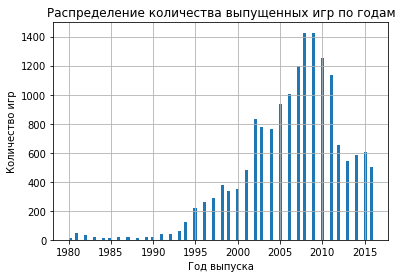

In [13]:
# Посмотрим данные на гистограмме 

data['year_of_release'].hist(bins=100)
plt.title('Распределение количества выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')

Видим резкий скачок выпуска игр (почти в 2 раза - с 62 по 121) произошел в 1994 году. Максимальное количество игр (1498) было выпущено в 2009 году. Затем пошел спад и в 2012 году годовой выпуск сократился почти в 2 раза - с 1136 до 653

In [14]:
data['platform'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

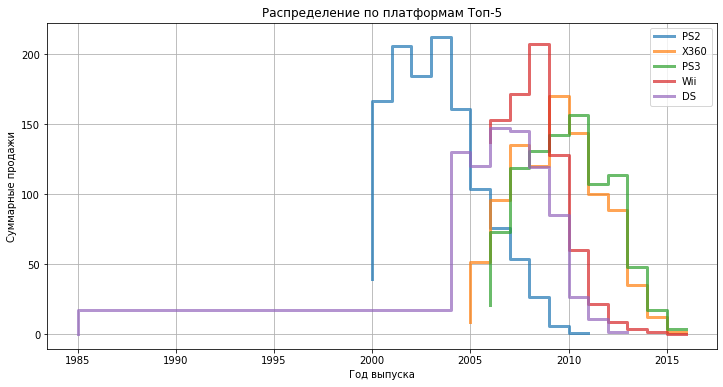

In [15]:
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

top_platforms = platform_sales.head(5)  # Выберем платформы с наибольшими продажами

# Построим распределение по годам для выбранных платформ
plt.figure(figsize=(12, 6))
for platform in top_platforms.index:
    platform_data = data[data['platform'] == platform]
    grouped_data = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.step(grouped_data.index, grouped_data.values, label=platform, linewidth=3, alpha=0.7)

plt.title('Распределение по платформам Топ-5')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.legend()
plt.grid(True)
plt.show()

В среднем активный срок деятельности каждой платформы - 5 лет.

Актуальный период берем 3 года, т.к. при большем значении можем "упустить" цикл развития платормы, а при меньшем - не увидеть 

In [16]:
data_fin = data[data['year_of_release'] > 2013.0]

data_fin.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98


In [17]:
platform_sales = data_fin.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

top_platforms = platform_sales.head(5)  # Выберем платформы с наибольшими продажами

top_platforms

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
Name: total_sales, dtype: float64

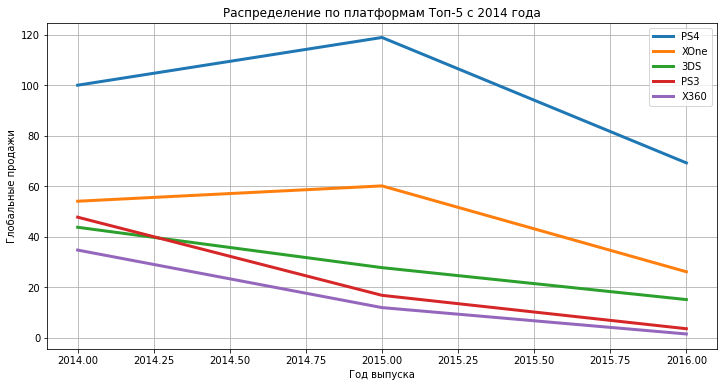

In [18]:
# Построим распределение по годам для выбранных платформ
plt.figure(figsize=(12, 6))
for platform in top_platforms.index:
    platform_data = data_fin[data_fin['platform'] == platform]
    grouped_data = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(grouped_data.index, grouped_data.values, label=platform, linewidth=3)

plt.title('Распределение по платформам Топ-5 с 2014 года')
plt.xlabel('Год выпуска')
plt.ylabel('Глобальные продажи')
plt.legend()
plt.grid(True)
plt.show()

Все платформы падают, но можно выделить трех лидеров: PS4, XOne и 3DS

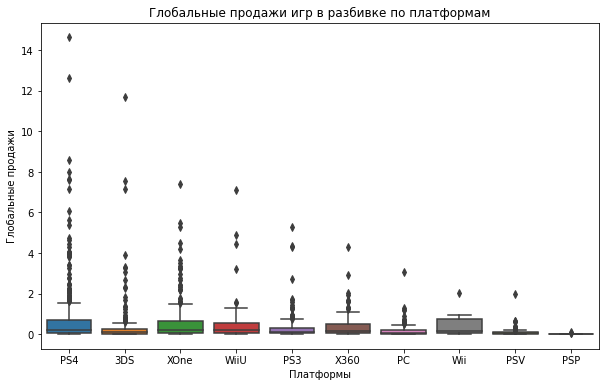

In [19]:
#строим график Глобальных продаж игр в разбивке по платформам

plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='total_sales', data=data_fin)
plt.xlabel('Платформы')
plt.ylabel('Глобальные продажи')
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.show()

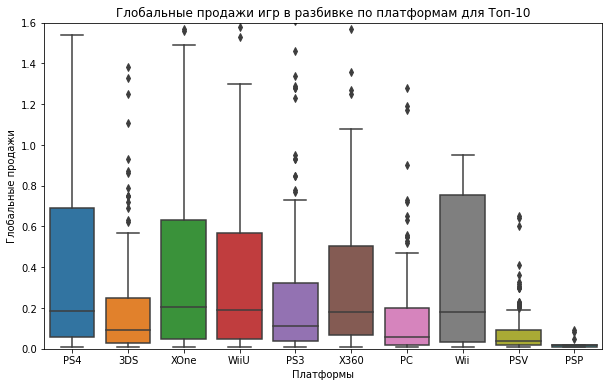

In [20]:
# Приближаем график 

plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='total_sales', data=data_fin)
plt.xlabel('Платформы')
plt.ylabel('Глобальные продажи')
plt.title('Глобальные продажи игр в разбивке по платформам для Топ-10')
plt.ylim(0, 1.6)
plt.show()

Медианные зачения находятся до отметки 0.2, у лидеров продаж примерно на одном уровне кроме 3DS. Мы видим,что у платформы Wii практически все продажи происходят внутри "ящика", в то время как у Топ-3: PS4, XOne и 3DS много значений, превышающих третий квартиль - 75%

Выходило много игр разного качества. Какие-то "залетали", а какие-то - нет

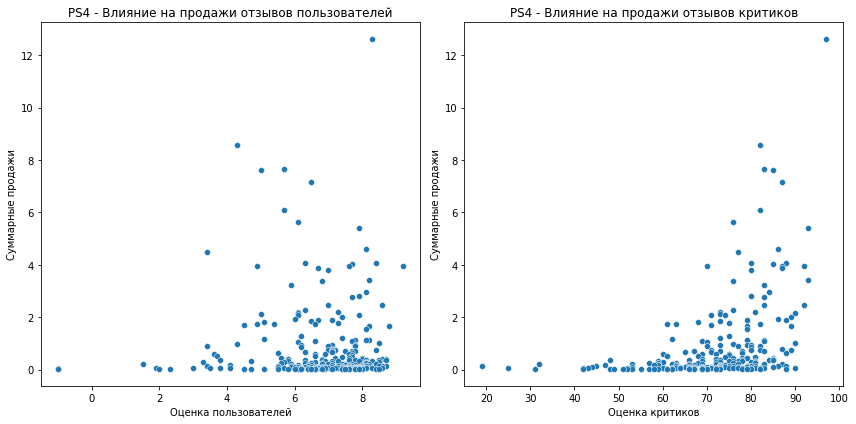

In [21]:
# Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
# Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами

platform = 'PS4'
platform_data = data_fin[data_fin['platform'] == platform]

# Построение диаграммы рассеяния для оценки пользователей
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=platform_data['user_score'], y=platform_data['total_sales'])
plt.title(f'{platform} - Влияние на продажи отзывов пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи')

# Построение диаграммы рассеяния для оценки критиков
plt.subplot(1, 2, 2)
sns.scatterplot(x=platform_data['critic_score'], y=platform_data['total_sales'])
plt.title(f'{platform} - Влияние на продажи отзывов критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи')

plt.tight_layout()
plt.show()

In [22]:
# Удаление значений-заглушек из данных
platform_data = platform_data[
    (platform_data['user_score'] != -1) & 
    (platform_data['critic_score'] != -1)
]
# Вычисление корреляции
user_corr = platform_data['user_score'].corr(platform_data['total_sales'])
critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])

print(f'Корреляция между оценкой пользователей и суммарными продажами для {platform}: {user_corr:.2f}')
print(f'Корреляция между оценкой критиков и суммарными продажами для {platform}: {critic_corr:.2f}')

Корреляция между оценкой пользователей и суммарными продажами для PS4: -0.04
Корреляция между оценкой критиков и суммарными продажами для PS4: 0.40


Корреляция между оценкой пользователей и суммарными продажами для PS4: -0,04 - **слабая отрицательная связь**

Корреляция между оценкой критиков и суммарными продажами для PS4: 0.4 - **умеренная положительная связь** 

In [23]:
# Вычисление корреляции
platform = '3DS'
platform_data = data_fin[data_fin['platform'] == platform]
user_corr = platform_data['user_score'].corr(platform_data['total_sales'])
critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])

print(f'Корреляция между оценкой пользователей и суммарными продажами для {platform}: {user_corr:.2f}')
print(f'Корреляция между оценкой критиков и суммарными продажами для {platform}: {critic_corr:.2f}')

Корреляция между оценкой пользователей и суммарными продажами для 3DS: 0.34
Корреляция между оценкой критиков и суммарными продажами для 3DS: 0.31


In [24]:
# Вычисление корреляции
platform = 'XOne'
platform_data = data_fin[data_fin['platform'] == platform]
user_corr = platform_data['user_score'].corr(platform_data['total_sales'])
critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])

print(f'Корреляция между оценкой пользователей и суммарными продажами для {platform}: {user_corr:.2f}')
print(f'Корреляция между оценкой критиков и суммарными продажами для {platform}: {critic_corr:.2f}')

Корреляция между оценкой пользователей и суммарными продажами для XOne: 0.09
Корреляция между оценкой критиков и суммарными продажами для XOne: 0.43


In [25]:
# Вычисление корреляции
platform = 'WiiU'
platform_data = data_fin[data_fin['platform'] == platform]
user_corr = platform_data['user_score'].corr(platform_data['total_sales'])
critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])

print(f'Корреляция между оценкой пользователей и суммарными продажами для {platform}: {user_corr:.2f}')
print(f'Корреляция между оценкой критиков и суммарными продажами для {platform}: {critic_corr:.2f}')

Корреляция между оценкой пользователей и суммарными продажами для WiiU: 0.34
Корреляция между оценкой критиков и суммарными продажами для WiiU: 0.37


In [26]:
# Вычисление корреляции
platform = 'PS3'
platform_data = data_fin[data_fin['platform'] == platform]
user_corr = platform_data['user_score'].corr(platform_data['total_sales'])
critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])

print(f'Корреляция между оценкой пользователей и суммарными продажами для {platform}: {user_corr:.2f}')
print(f'Корреляция между оценкой критиков и суммарными продажами для {platform}: {critic_corr:.2f}')

Корреляция между оценкой пользователей и суммарными продажами для PS3: 0.13
Корреляция между оценкой критиков и суммарными продажами для PS3: 0.45


In [27]:
# Вычисление корреляции
platform = 'X360'
platform_data = data_fin[data_fin['platform'] == platform]
user_corr = platform_data['user_score'].corr(platform_data['total_sales'])
critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])

print(f'Корреляция между оценкой пользователей и суммарными продажами для {platform}: {user_corr:.2f}')
print(f'Корреляция между оценкой критиков и суммарными продажами для {platform}: {critic_corr:.2f}')

Корреляция между оценкой пользователей и суммарными продажами для X360: 0.04
Корреляция между оценкой критиков и суммарными продажами для X360: 0.53


In [28]:
# Вычисление корреляции
platform = 'PC'
platform_data = data_fin[data_fin['platform'] == platform]
user_corr = platform_data['user_score'].corr(platform_data['total_sales'])
critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])

print(f'Корреляция между оценкой пользователей и суммарными продажами для {platform}: {user_corr:.2f}')
print(f'Корреляция между оценкой критиков и суммарными продажами для {platform}: {critic_corr:.2f}')

Корреляция между оценкой пользователей и суммарными продажами для PC: 0.01
Корреляция между оценкой критиков и суммарными продажами для PC: 0.17


In [29]:
# Вычисление корреляции
platform = 'Wii'
platform_data = data_fin[data_fin['platform'] == platform]
user_corr = platform_data['user_score'].corr(platform_data['total_sales'])
critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])

print(f'Корреляция между оценкой пользователей и суммарными продажами для {platform}: {user_corr:.2f}')
print(f'Корреляция между оценкой критиков и суммарными продажами для {platform}: {critic_corr:.2f}')

Корреляция между оценкой пользователей и суммарными продажами для Wii: 0.76
Корреляция между оценкой критиков и суммарными продажами для Wii: nan


In [30]:
# Вычисление корреляции
platform = 'PSV'
platform_data = data_fin[data_fin['platform'] == platform]
user_corr = platform_data['user_score'].corr(platform_data['total_sales'])
critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])

print(f'Корреляция между оценкой пользователей и суммарными продажами для {platform}: {user_corr:.2f}')
print(f'Корреляция между оценкой критиков и суммарными продажами для {platform}: {critic_corr:.2f}')

Корреляция между оценкой пользователей и суммарными продажами для PSV: 0.14
Корреляция между оценкой критиков и суммарными продажами для PSV: 0.04


In [31]:
# Вычисление корреляции
platform = 'PSP'
platform_data = data_fin[data_fin['platform'] == platform]
user_corr = platform_data['user_score'].corr(platform_data['total_sales'])
critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])

print(f'Корреляция между оценкой пользователей и суммарными продажами для {platform}: {user_corr:.2f}')
print(f'Корреляция между оценкой критиков и суммарными продажами для {platform}: {critic_corr:.2f}')

Корреляция между оценкой пользователей и суммарными продажами для PSP: nan
Корреляция между оценкой критиков и суммарными продажами для PSP: nan


**Вывод:** Оценка пользователей влияет на продажи в очень слабой степени. А вот взаимосвязь между оценкой критиков и продажами чаще всего умеренная

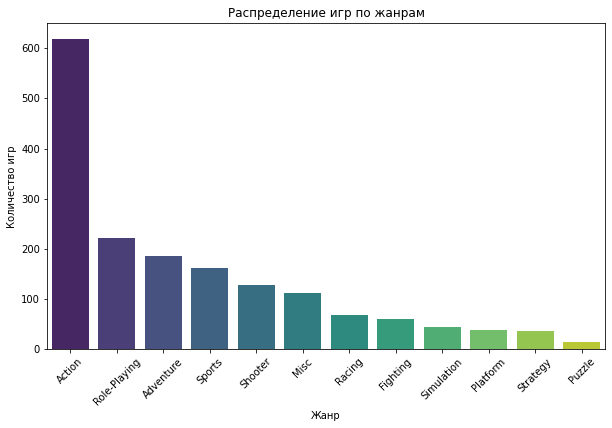

In [32]:
# Построение гистограммы распределения жанров

genre_count = data_fin['genre'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_count.index, y=genre_count.values, palette='viridis')
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')

plt.xticks(rotation=45)
plt.show()

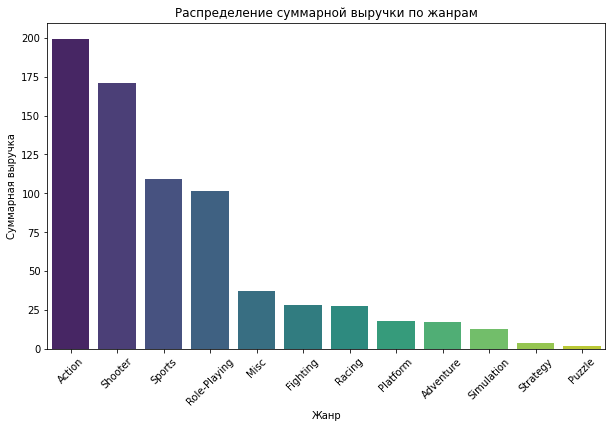

In [33]:
# Построение гистограммы суммарной выручки по жанрам

genre_revenue = data_fin.groupby('genre')['total_sales'].sum()
genre_revenue = genre_revenue.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_revenue.index, y=genre_revenue.values, palette='viridis')
plt.title('Распределение суммарной выручки по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Суммарная выручка')

plt.xticks(rotation=45)
plt.show()

Безусловным лидером по суммарной выручке и количеству игр является жанр "action". На втором месте по выручке занимает жанр "Shooter", а вот по количеству игр он только на пятом месте. Третье место по суммарной выручке у жанра "Sports", занимающего в рейтинге количества игр четвертую позицию. А вот у жанра Role-Playing второе место по количеству игр, но лишь четвертое по суммарной выручке. 

В целом, можно выделить ТОП-4 жанров, приносящих максимальную выручку: Action, Shooter, Sports, Role-Playing. После них идет снижение выручки

**Шаг 4. Составьте портрет пользователя каждого региона**

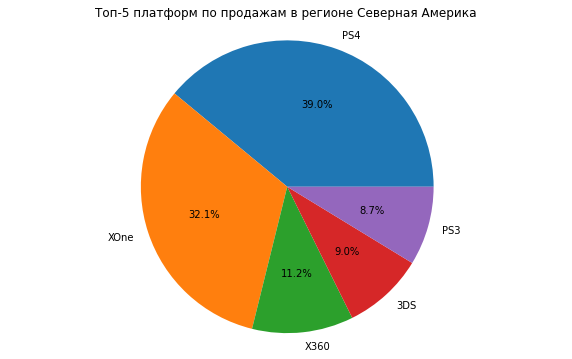

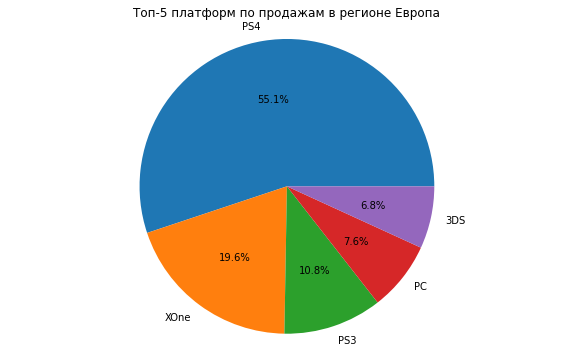

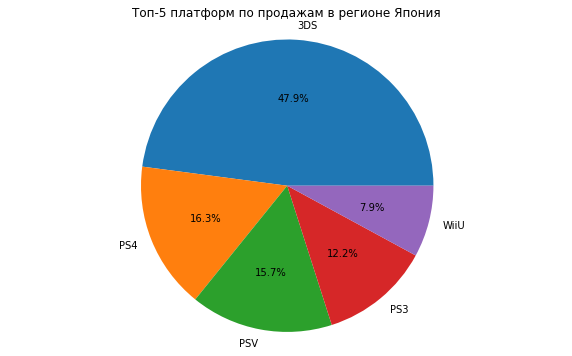

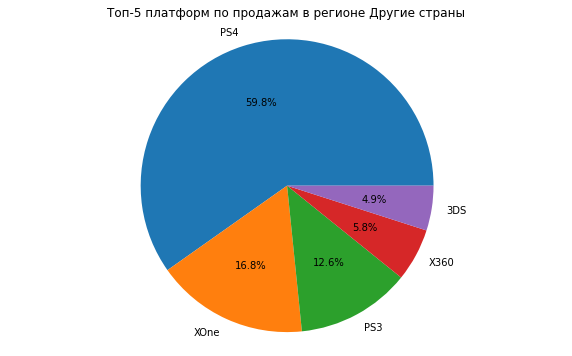

In [34]:
# Определите для пользователя каждого региона cамые популярные платформы (топ-5).

platform_sales = data_fin.groupby('platform').sum()

# Определение топ-5 платформ по продажам в каждом регионе
top_platforms_na = platform_sales['na_sales'].sort_values(ascending=False).head(5)
top_platforms_eu = platform_sales['eu_sales'].sort_values(ascending=False).head(5)
top_platforms_jp = platform_sales['jp_sales'].sort_values(ascending=False).head(5)
top_platforms_os = platform_sales['other_sales'].sort_values(ascending=False).head(5)


# Функция для построения круговой диаграммы

def plot_top_platforms(data_fin, region, color):
    plt.figure(figsize=(10, 6))
    plt.pie(data_fin.values, labels=data_fin.index, autopct='%1.1f%%')
    plt.title(f'Топ-5 платформ по продажам в регионе {region}')
    plt.axis('equal')
    plt.show()

plot_top_platforms(top_platforms_na, 'Северная Америка', 'Blues')

# Построение круговой диаграммы для EU
plot_top_platforms(top_platforms_eu, 'Европа', 'Greens')

# Построение круговой диаграммы для JP
plot_top_platforms(top_platforms_jp, 'Япония', 'Reds')

# Построение круговой диаграммы для Other_sales
plot_top_platforms(top_platforms_os, 'Другие страны', 'Greys')



In [35]:
# Вычисление долей продаж для каждого региона
def calculate_sales_shares(data_fin):
    total_sales = data_fin.sum()
    shares = (data_fin / total_sales) * 100
    return shares

shares_na = calculate_sales_shares(top_platforms_na)
shares_eu = calculate_sales_shares(top_platforms_eu)
shares_jp = calculate_sales_shares(top_platforms_jp)
shares_os = calculate_sales_shares(top_platforms_os)


# Вывод долей продаж
print("NA доля продаж (%):\n", shares_na)
print("\nEU доля продаж (%):\n", shares_eu)
print("\nJP доля продаж (%):\n", shares_jp)
print("\nOther доля продаж (%):\n", shares_os)


NA доля продаж (%):
 platform
PS4     38.996322
XOne    32.139044
X360    11.191521
3DS      8.953217
PS3      8.719896
Name: na_sales, dtype: float64

EU доля продаж (%):
 platform
PS4     55.120380
XOne    19.604103
PS3     10.825704
PC       7.616989
3DS      6.832825
Name: eu_sales, dtype: float64

JP доля продаж (%):
 platform
3DS     47.915087
PS4     16.267735
PSV     15.747861
PS3     12.152063
WiiU     7.917253
Name: jp_sales, dtype: float64

Other доля продаж (%):
 platform
PS4     59.784946
XOne    16.827957
PS3     12.594086
X360     5.846774
3DS      4.946237
Name: other_sales, dtype: float64


В северной Америке лидируют платформы: PS4, XOne, X360, 3DS, PS3
В Европе лидируют платформы:  PS4, XOne, PS3, PC, 3DS
В Японии лидируют платформы: 3DS, PS4, PSV, PS3, WiiU
В Других странах лидируют платформы: PS4, XOne, PS3, X360, 3DS

Мы можем наблюдать, что распределение доли продаж среди ТОП-5 равномерное, но можно выделиь лидера PS4 во всех регионах кроме Японии. В Японии лидер - 3DS. Комбинация платформ в разных регионах разная, хотя набор платформ в ТОП-5 схож. Но в топе в основном PS4, XOne, PS3

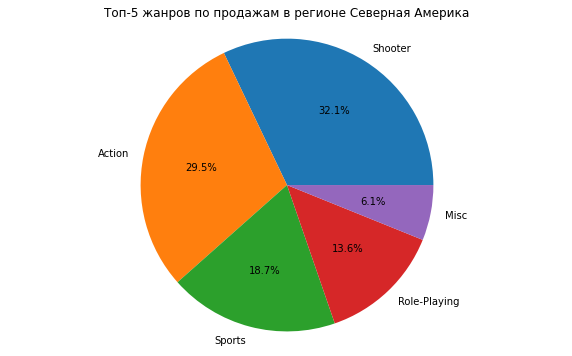

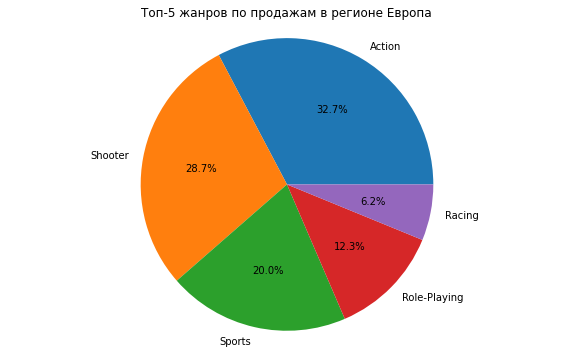

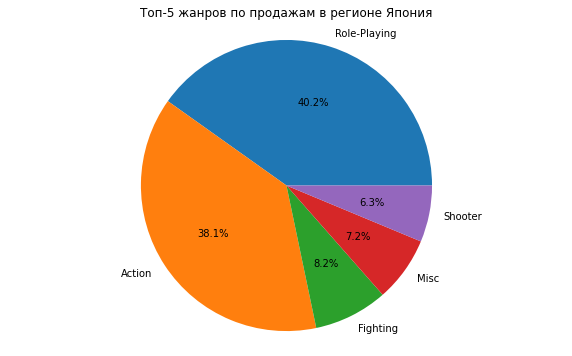

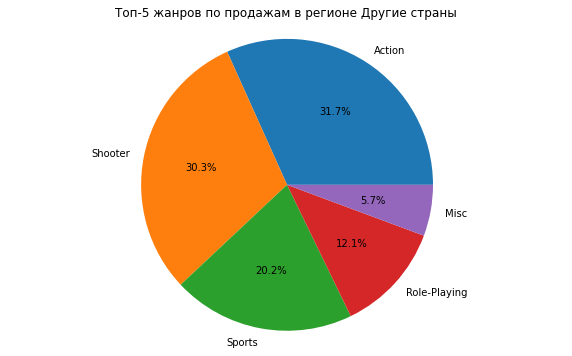

In [36]:
# Определите для пользователя каждого региона cамые популярные жанры (топ-5).

genre_sales = data_fin.groupby('genre').sum()

# Определение топ-5 жанров по продажам в каждом регионе
top_genre_na = genre_sales['na_sales'].sort_values(ascending=False).head(5)
top_genre_eu = genre_sales['eu_sales'].sort_values(ascending=False).head(5)
top_genre_jp = genre_sales['jp_sales'].sort_values(ascending=False).head(5)
top_genre_os = genre_sales['other_sales'].sort_values(ascending=False).head(5)


# Функция для построения круговой диаграммы

def plot_top_genre_pie(data_fin, region, color):
    plt.figure(figsize=(10, 6))
    plt.pie(data_fin.values, labels=data_fin.index, autopct='%1.1f%%')
    plt.title(f'Топ-5 жанров по продажам в регионе {region}')
    plt.axis('equal')
    plt.show()

plot_top_genre_pie(top_genre_na, 'Северная Америка', 'Blues')

# Построение круговой диаграммы для EU
plot_top_genre_pie(top_genre_eu, 'Европа', 'Greens')

# Построение круговой диаграммы для JP
plot_top_genre_pie(top_genre_jp, 'Япония', 'Reds')

# Построение круговой диаграммы для Other_sales
plot_top_genre_pie(top_genre_os, 'Другие страны', 'Greys')

In [37]:
# Вычисление долей продаж для каждого региона
def calculate_sales_shares(data_fin):
    total_sales = data_fin.sum()
    shares = (data_fin / total_sales) * 100
    return shares

shares_na = calculate_sales_shares(top_platforms_na)
shares_eu = calculate_sales_shares(top_platforms_eu)
shares_jp = calculate_sales_shares(top_platforms_jp)
shares_os = calculate_sales_shares(top_platforms_os)


# Вывод долей продаж
print("NA доля продаж (%):\n", shares_na)
print("\nEU доля продаж (%):\n", shares_eu)
print("\nJP доля продаж (%):\n", shares_jp)
print("\nOther доля продаж (%):\n", shares_os)
# Вычисление долей продаж для каждого региона

shares_na = calculate_sales_shares(top_genre_na)
shares_eu = calculate_sales_shares(top_genre_eu)
shares_jp = calculate_sales_shares(top_genre_jp)
shares_os = calculate_sales_shares(top_genre_os)


# Вывод долей продаж
print("NA доля продаж (%):\n", shares_na)
print("\nEU доля продаж (%):\n", shares_eu)
print("\nJP доля продаж (%):\n", shares_jp)
print("\nOther доля продаж (%):\n", shares_os)


NA доля продаж (%):
 platform
PS4     38.996322
XOne    32.139044
X360    11.191521
3DS      8.953217
PS3      8.719896
Name: na_sales, dtype: float64

EU доля продаж (%):
 platform
PS4     55.120380
XOne    19.604103
PS3     10.825704
PC       7.616989
3DS      6.832825
Name: eu_sales, dtype: float64

JP доля продаж (%):
 platform
3DS     47.915087
PS4     16.267735
PSV     15.747861
PS3     12.152063
WiiU     7.917253
Name: jp_sales, dtype: float64

Other доля продаж (%):
 platform
PS4     59.784946
XOne    16.827957
PS3     12.594086
X360     5.846774
3DS      4.946237
Name: other_sales, dtype: float64
NA доля продаж (%):
 genre
Shooter         32.095857
Action          29.459789
Sports          18.736799
Role-Playing    13.594639
Misc             6.112916
Name: na_sales, dtype: float64

EU доля продаж (%):
 genre
Action          32.721378
Shooter         28.707882
Sports          20.036805
Role-Playing    12.342812
Racing           6.191123
Name: eu_sales, dtype: float64

JP доля п

В регионах Северная Америка и Европа мы видим одинаковый набор жанров в ТОП-3: Action, Sports, Shooter
В Японии на первое место с большим отрывом выходят жанры Role-Playing и Action.

In [38]:
# Преобразование категориальных данных в числовые.
rating_mapping = {
    'E': 1,  # Everyone
    'E10+': 2,  # Everyone 10 and older
    'T': 3,  # Teen
    'M': 4,  # Mature
    'AO': 5,  # Adults Only
    'K-A': 0,  # Kids to Adults (старый рейтинг, заменён на E)
    'EC': 0  # Early Childhood
}

data_fin['numeric_rating'] = data_fin['rating'].map(rating_mapping)

# Рассчитайте корреляцию для различных регионов
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for region in regions:
    corr_value = data_fin['numeric_rating'].corr(data[region])
    print(f'Корреляция между рейтингом и {region}: {corr_value}')

Корреляция между рейтингом и na_sales: 0.09397845795738925
Корреляция между рейтингом и eu_sales: 0.05644289977644462
Корреляция между рейтингом и jp_sales: -0.003736476105275465
Корреляция между рейтингом и other_sales: 0.08800109883855649


/tmp/ipykernel_48/3476489556.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fin['numeric_rating'] = data_fin['rating'].map(rating_mapping)


Выявлена во всех регионах кроме Японии слабая положительная связь. В Японии - слабая отрицательная связь

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Давай визуализируем продажи по рейтингам тоже (топ-5 для каждого региона), так информация будет гораздо нагляднее, ведь мы делаем исследование для отдела маркетинга :) Тут подойдет `barplot` или `piechart`</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера 2:</b> 
    
Продажи по жанрам уже были визуализированы выше, нужно добавить диаграммы для продаж по **рейтингам ESRB**</div>

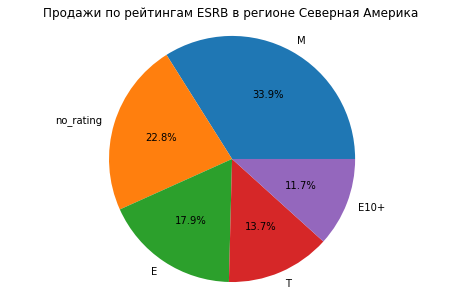

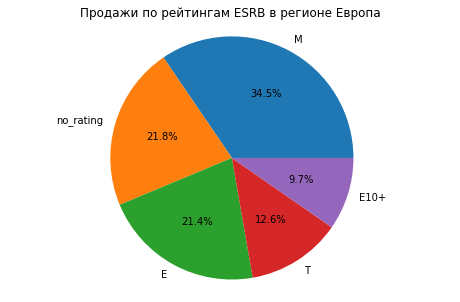

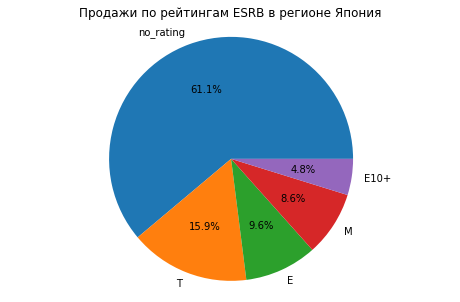

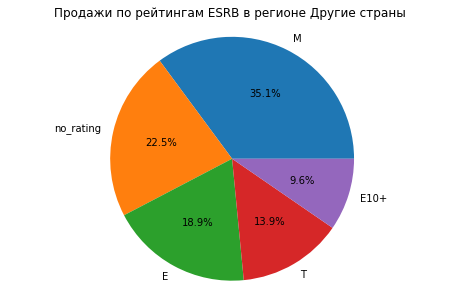

In [39]:
# Определите для пользователя каждого региона cамые популярные рейтинги (топ-5).

rating_sales = data_fin.groupby('rating').sum()

# Определение топ-5 жанров по продажам в каждом регионе
top_rating_na = rating_sales['na_sales'].sort_values(ascending=False).head(5)
top_rating_eu = rating_sales['eu_sales'].sort_values(ascending=False).head(5)
top_rating_jp = rating_sales['jp_sales'].sort_values(ascending=False).head(5)
top_rating_os = rating_sales['other_sales'].sort_values(ascending=False).head(5)# Визуализация круговых диаграмм
def plot_sales_pie(shares, region, color):
    plt.figure(figsize=(8, 5))
    plt.pie(shares.values, labels=shares.index, autopct='%1.1f%%')
    plt.title(f'Продажи по рейтингам ESRB в регионе {region}')
    plt.axis('equal')
    plt.show()
    
# Построение круговых диаграмм для каждого региона
plot_sales_pie(top_rating_na, 'Северная Америка', 'Blues')
plot_sales_pie(top_rating_eu, 'Европа', 'Greens')
plot_sales_pie(top_rating_jp, 'Япония', 'Reds')
plot_sales_pie(top_rating_os, 'Другие страны', 'Greys')

Во всех регионах кроме Японии лидируют продажи по рейтингу М, на втором месте - Е. В Японии лидер продаж - Т, на втором месте - также Е, а М занимает третью строчку

В Японии большинство игр не имеют рейтинга ESRB связано с тем, что это нутренние особенности страны

**Шаг 5. Проверьте гипотезы**

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

1. **Формулировка гипотез**:
    - Нулевая гипотеза (H0): Средние пользовательские рейтинги для платформ Xbox One и PC одинаковые (μ_XboxOne = μ_PC).
    - Альтернативная гипотеза (H1): Средние пользовательские рейтинги для платформ Xbox One и PC различаются (μ_XboxOne ≠ μ_PC).


2. **Предварительная обработка данных**:
    - Удаление пропусков в данных.
    - Выбор данных по соответствующим платформам.


3. **Выполнение t-теста для независимых выборок**.
4. **Интерпретация результатов**.

In [40]:
# Выбор данных для платформ Xbox One и PC и удаление пропусков
xbox_one_scores = data_fin.loc[data_fin['platform'] == 'XOne', 'user_score'].dropna()
pc_scores = data_fin.loc[data['platform'] == 'PC', 'user_score'].dropna()
data_fin = data_fin[data_fin['user_score'] != -1]

# Создание выборки для Xbox One и фильтрация значений '-1'
xbox_one_scores = data_fin.loc[(data_fin['platform'] == 'XOne') & (data_fin['user_score'] != -1), 'user_score'].dropna()

# Создание выборки для PC и фильтрация значений '-1'
pc_scores = data_fin.loc[(data_fin['platform'] == 'PC') & (data_fin['user_score'] != -1), 'user_score'].dropna()


# Выполнение t-теста для независимых выборок
t_stat, p_value = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

print(f"t-статистика: {t_stat}")
print(f"p-значение: {p_value}")

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги различаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние пользовательские рейтинги не различаются.")

t-статистика: 1.577760647447497
p-значение: 0.11601398086668832
Не отвергаем нулевую гипотезу: средние пользовательские рейтинги не различаются.


In [41]:
# код ревьюера

print(-1 in xbox_one_scores.unique())
print(-1 in pc_scores.unique())

False
False


Проверяем гипотезу: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза (H0): Средние рейтинги жанров Action и Sports одинаковые.
Альтернативная гипотеза (H1): Средние рейтинги жанров Action и Sports разные.

In [42]:
# Выбор данных для платформ Xbox One и PC и удаление пропусков
action_scores = data_fin.loc[(data_fin['genre'] == 'Action') & (data_fin['user_score'] != -1), 'user_score'].dropna()
sports_scores = data_fin.loc[(data_fin['genre'] == 'Sports') & (data_fin['user_score'] != -1), 'user_score'].dropna()

# Выполнение t-теста для независимых выборок
t_stat, p_value = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

print(f"t-статистика: {t_stat}")
print(f"p-значение: {p_value}")

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги различаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние пользовательские рейтинги не различаются.")

t-статистика: 8.384614718486121
p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу: средние пользовательские рейтинги различаются.


In [43]:
# код ревьюера

print(-1 in action_scores.unique())
print(-1 in sports_scores.unique())

False
False


 **Вывод**

1. Изначально проводилась проверка данных. Была изменены названия столбцов, выявлены и отфильтрованы дубликаты, заменены пропуски там, где это возможно

2. Изучили данные: 
* В 1994 году произошел резкий скачок выпуска игр (почти в 2 раза - с 62 по 121). Максимальное количество игр (1498) было выпущено в 2009 году. Затем пошел спад и в 2012 году годовой выпуск сократился почти в 2 раза - с 1136 до 653

* В среднем активный срок деятельности каждой платформы - 5 лет.

* Актуальный период берем 3 года, т.к. при большем значении можем "упустить" цикл развития платормы, а при меньшем - не увидеть

* Мы можем наблюдать, что распределение доли продаж среди ТОП-5 платорм равномерное, но можно выделиь лидера PS4 во всех регионах кроме Японии. В Японии лидер - 3DS. Комбинация платформ в разных регионах разная, хотя набор платформ в ТОП-5 схож. Но в топе в основном PS4, XOne, PS3

* Безусловным лидером по суммарной выручке и количеству игр является жанр "action". На втором месте по выручке занимает жанр "sports", а вот по количеству игр он только на четвертом месте. Третье место по суммарной выручке у жанра "shooter", занимающего в рейтинге количества игр лишь пятую позицию. А вот у жанра Role-Playing второе место по количеству игр, но лишь четвертое по суммарной выручке. 

    * В регионах Северная Америка и Европа мы видим одинаковый набор жанров в ТОП-3: Action, Sports, Shooter
В Японии на первое место с большим отрывом выходят жанры Role-Playing и Action.
    
В целом, можно выделить ТОП-4 жанров, приносящих максимальную выручку: Action, Sports, Shooter, Role-Playing. После них идет снижение выручки


* Выявлена во всех регионах кроме Японии слабая положительная связь влияния рейтинга ESRB на продажи. В Японии - слабая отрицательная связь

* На продажи влияют оценки критиков, но практически не влияют оценки пользователей

* Проверка гипотез: 

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Средние пользовательские рейтинги жанров Action и Sports разные.